In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2485,ham,Lol that's different. I don't go trying to fin...,NaN,NaN,NaN
4898,ham,"Haha, that was the first person I was gonna ask",NaN,NaN,NaN
5178,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...,NaN,NaN,NaN
4966,spam,You can donate å£2.50 to UNICEF's Asian Tsunam...,NaN,NaN,NaN
2561,ham,And maybe some pressies,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. convert to website

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.sample(20)

,v1,v2
1301,ham,I tot u reach liao. He said t-shirt.
4405,spam,As one of our registered subscribers u can ent...
5234,ham,Ok cool. See ya then.
5181,ham,K sure am in my relatives home. Sms me de. Pls:-)
1977,spam,Reply to win å£100 weekly! Where will the 2006...
2765,ham,and picking them up from various points
4148,ham,Haven't found a way to get another app for you...
5273,ham,Its too late:)but its k.wish you the same.
1331,ham,Good Morning plz call me sir
153,ham,As per your request 'Melle Melle (Oru Minnamin...


In [9]:
# renaming the columns
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [10]:
df.sample(20)

,target,text
1187,ham,There's no point hangin on to mr not right if ...
2770,ham,No problem. Talk to you later
3274,ham,Hurry home u big butt. Hang up on your last ca...
1487,ham,I told your number to gautham..
1026,ham,Yes da. Any plm at ur office
733,ham,Even u dont get in trouble while convincing..j...
3384,ham,Ok can...
4869,ham,Dip's cell dead. So i m coming with him. U bet...
4272,ham,Kind of. Just missed train cos of asthma attac...
2838,ham,"Easy mate, * guess the quick drink was bit amb..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
5010,1,You have WON a guaranteed å£1000 cash or a å£2...
2236,0,Pls tell nelson that the bb's are no longer co...
501,0,When can Ì_ come out?
3304,0,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...
932,0,So do you have samus shoulders yet


In [14]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicates
df.duplicated().sum()

403

In [16]:
# remove duplicates0
df = df.drop_duplicates(keep = 'first')

In [17]:
df.sample(20)

,target,text
1697,0,Hai priya are you right. What doctor said pa. ...
355,0,Thank You for calling.Forgot to say Happy Onam...
874,0,Talk With Yourself Atleast Once In A Day...!!!...
1233,0,Lol ok. I'll snatch her purse too.
920,0,When u wana see it then
2721,0,I'm working technical support :)voice process.
2182,0,PS U no ur a grown up now right?
4476,0,Oh :-)only 4 outside players allowed to play know
1845,0,Hi. || Do u want | to join me with sts later? ...
982,1,Congrats! 2 mobile 3G Videophones R yours. cal...


In [18]:
df.shape

(5169, 2)

## EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
import matplotlib.pyplot as plt

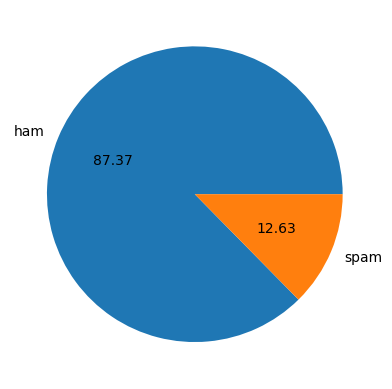

In [21]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [22]:
# data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bose9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
# fetch number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head(10)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# describe only for ham msgs
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# describe for spam msgs
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

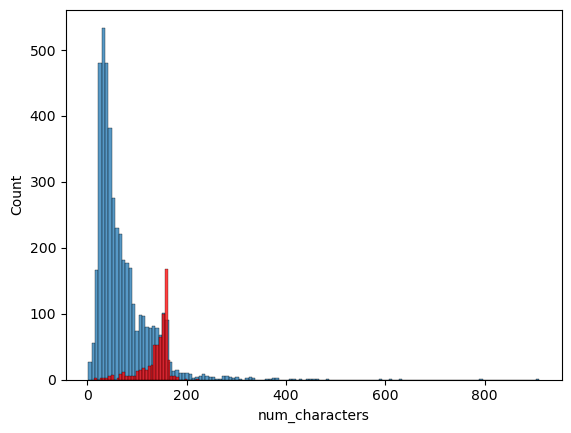

In [34]:
# plotting histograms for see the no of characters in spam and ham msgs
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')


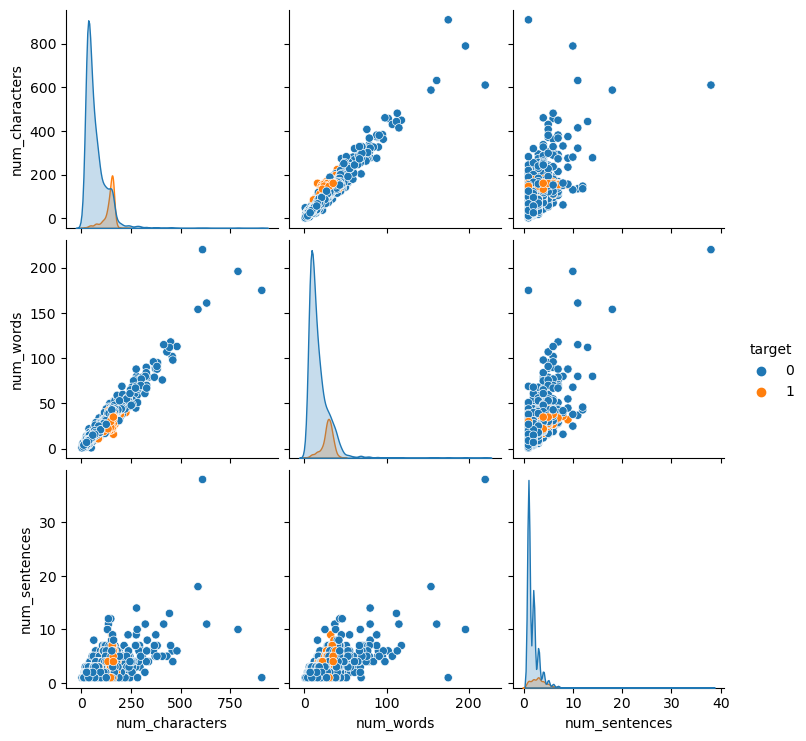

In [35]:
# to see relationship between the columns
sns.pairplot(df,hue = 'target')

In [36]:
df.corr()

C:\Users\bose9\AppData\Local\Temp\ipykernel_17348\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\bose9\AppData\Local\Temp\ipykernel_17348\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

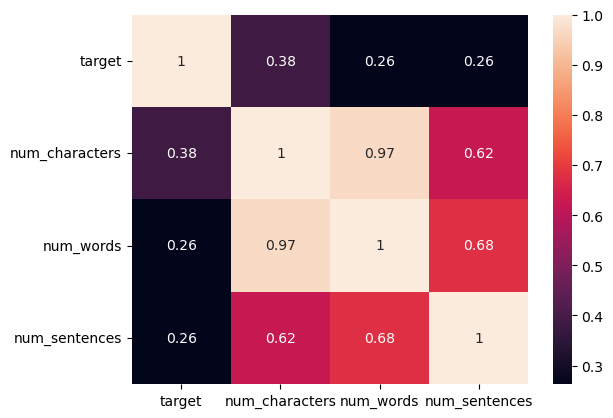

In [37]:
sns.heatmap(df.corr(),annot = True)

## Data Preprocessing

In [38]:
# lower case
# tokenization
# removing spl charcts
# removing stop words and punctuation
# stemming

In [51]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in string.punctuation and i not in stop_words:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
            
    
    
    return " ".join(y)

In [52]:
transform("Hi how are you Debangshu?")

'hi debangshu'

In [53]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bose9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stop_words = stopwords.words('english')

In [55]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
transform("why are you going to the market")

'go market'

In [58]:
from nltk.stem.porter import PorterStemmer

In [59]:
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [60]:
transform(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [61]:
df['transformed_text'] = df['text'].apply(transform)

In [62]:
df.head(20)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [63]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [64]:
! pip install wordcloud


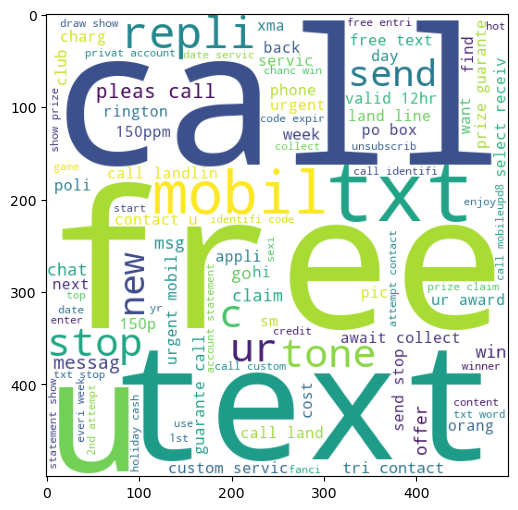

In [65]:
# wordcloud for spam msgs
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

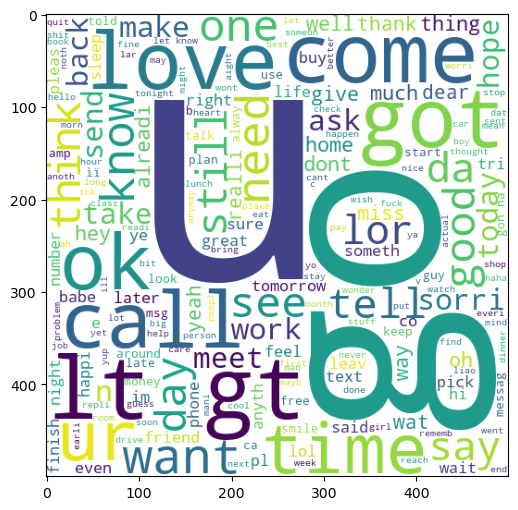

In [66]:
# wordcloud for ham msgs
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [67]:
# to find the words in spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(len(spam_corpus)) 

9939


In [68]:
# to find the words in ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
print(len(ham_corpus))

35404


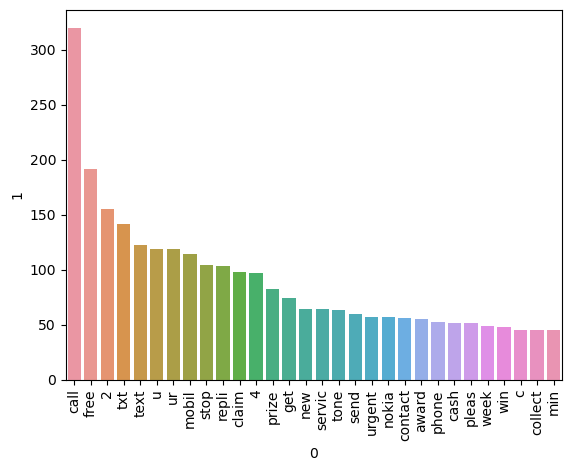

In [69]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =  pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

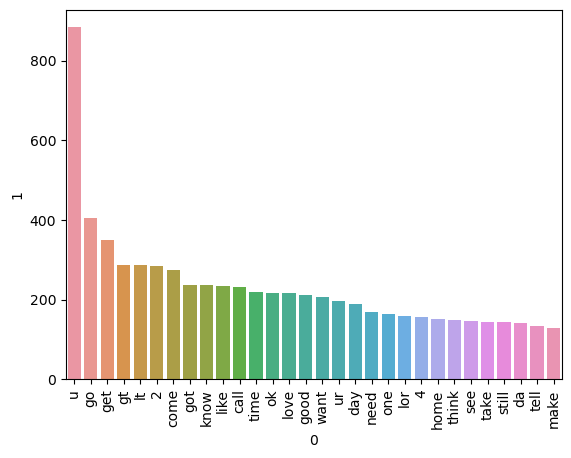

In [70]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## model building

In [71]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [72]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [73]:
x  = cv.fit_transform(df['transformed_text']).toarray()

In [74]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
x.shape # input

(5169, 6708)

In [76]:
y = df['target'].values

In [77]:
y  # target

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

In [82]:
print("Accuracy score is :", accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("Precision score : ", precision_score(y_test,y_pred1))

Accuracy score is : 0.8800773694390716
[[792 104]
 [ 20 118]]
Precision score :  0.5315315315315315


In [83]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

In [84]:
print("Accuracy score is :", accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("Precision score : ", precision_score(y_test,y_pred2))

Accuracy score is : 0.9642166344294004
[[871  25]
 [ 12 126]]
Precision score :  0.8344370860927153


In [85]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

In [86]:
print("Accuracy score is :", accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("Precision score : ", precision_score(y_test,y_pred3))

Accuracy score is : 0.9700193423597679
[[893   3]
 [ 28 110]]
Precision score :  0.9734513274336283


In [87]:
x_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
x_tfidf.shape

(5169, 3000)

In [90]:
x_tfidf_train,x_tfidf_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.2,random_state=2)

In [91]:
gnb.fit(x_tfidf_train,y_train)

GaussianNB()

In [92]:
y_pred_g = gnb.predict(x_tfidf_test)

In [93]:
print("Accuracy score is :", accuracy_score(y_test,y_pred_g))
print(confusion_matrix(y_test,y_pred_g))
print("Precision score : ", precision_score(y_test,y_pred_g))

Accuracy score is : 0.8694390715667312
[[788 108]
 [ 27 111]]
Precision score :  0.5068493150684932


In [94]:
mnb.fit(x_tfidf_train,y_train)

MultinomialNB()

In [95]:
y_pred_m =mnb.predict(x_tfidf_test)

In [96]:
print("Accuracy score is :", accuracy_score(y_test,y_pred_m))
print(confusion_matrix(y_test,y_pred_m))
print("Precision score : ", precision_score(y_test,y_pred_m))  ## very good precision score

Accuracy score is : 0.9709864603481625
[[896   0]
 [ 30 108]]
Precision score :  1.0


In [97]:
bnb.fit(x_tfidf_train,y_train)

BernoulliNB()

In [98]:
y_pred_b =bnb.predict(x_tfidf_test)

In [99]:
print("Accuracy score is :", accuracy_score(y_test,y_pred_b))
print(confusion_matrix(y_test,y_pred_b))
print("Precision score : ", precision_score(y_test,y_pred_b))

Accuracy score is : 0.9835589941972921
[[895   1]
 [ 16 122]]
Precision score :  0.991869918699187


In [100]:
import pickle

In [101]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))